In [1]:
import random

def generate_binary_list(n):
    # Generate a list of random 0s and 1s
    binary_list = [random.choice([0, 1]) for _ in range(n)]
    
    # Count the number of 1s
    #num_ones = binary_list.count(1)
    
    return binary_list

def process_of_parity(ls):
    outputs=[]
    for i in range(len(ls)):
        outputs.append((ls[i:],ls[i:].count(1)%2))
    return outputs

def get_outputs(ls):
    outputs=process_of_parity(ls)
    returns=[]
    prompt_template='What is the parity of {}?\nSolution: '
    prompt_template2='\nReturn: {}\nAnswer: '
    out_template='Call: What is the parity of {}?\n'
    for i in range(len(outputs)):
        if i==len(outputs)-1:
            prompt=prompt_template.format(outputs[i][0])
            out=str(outputs[i][1])
            returns.append((prompt,out))
            continue
        current=outputs[i]
        nex=outputs[i+1]
        prompt1=prompt_template.format(current[0])
        out1=out_template.format(nex[0])
        prompt2=prompt1+out1+prompt_template2.format(nex[1])
        out2=str(current[1])
        returns.append((prompt1,out1))
        returns.append((prompt2,out2))
    return returns

def get_outputs_nonrec(ls):
    prompt='What is the parity of {}?\nSolution: '.format(ls)
    output='Compute one element at a time.'
    for i in range(len(ls)):
        output+=' '+str(ls[:i+1].count(1)%2)
    return (prompt,output)

In [2]:
import itertools

num_lists=250000

def generate_binary_lists(n):
    return [list(map(int, seq)) for seq in itertools.product("01", repeat=n)]


binary_lists = generate_binary_lists(21)
selected_lists = random.sample(binary_lists, num_lists)

dataset=[]
for ls in selected_lists:
    outputs=get_outputs(ls)
    for output in outputs:
        dataset.append({'input':output[0],'output':output[1]})
        
print(len(dataset))

10250000


In [3]:
from collections import defaultdict
import tqdm
data = defaultdict(lambda: defaultdict(list))
for i, row in enumerate(tqdm.tqdm(dataset, desc=f'Processing data', disable=False)):
    prompt = row['input']
    data[prompt]['sft_target'] = row['output']

Processing data: 100%|█████████| 10250000/10250000 [00:06<00:00, 1548829.27it/s]


In [4]:
import re
import matplotlib.pyplot as plt
import random

def parity_resampler(data_point):
    if find_array_length(data_point[0]) == 1:
        return [data_point]*450*2
    if find_array_length(data_point[0]) == 2:
        return [data_point]*120*2
    if find_array_length(data_point[0]) == 3:
        return [data_point]*50*2
    if find_array_length(data_point[0]) == 4:
        return [data_point]*25*2
    if find_array_length(data_point[0]) == 5:
        return [data_point]*12*2
    if find_array_length(data_point[0]) == 6:
        return [data_point]*6*2
    if find_array_length(data_point[0]) == 7:
        return [data_point]*3*2
    if find_array_length(data_point[0]) == 8:
        return [data_point]*2*2
    if find_array_length(data_point[0]) == 11:
        return [data_point]*2*2
    return [data_point]

def resample_point(resampler_str, data_point):
    if resampler_str == 'parity':
        return parity_resampler(data_point)
    elif resampler_str == 'dp':
        return dp_resampler(data_point)
    elif resampler_str == 'addition':
        return addition_resampler(data_point)
    else: print('incorrect resampler string')

def find_array_length(s):
    # Regular expression to find an array pattern
    match = re.search(r'\[(-?\d+,\s*)*(-?\d+)\]', s)
    if match:
        # Extracting the array string
        array_str = match.group(0)
        # Splitting the array string into elements
        array_elements = array_str[1:-1].split(',')
        return len(array_elements)
    else:
        return None

In [5]:
resampled_data=[]
for prompt, dat in data.items():
    if find_array_length(prompt) > 10 and random.random() < .9: continue
    if find_array_length(prompt) > 16 and random.random() < (find_array_length(prompt)-16)/10+.25: continue
    resampled_data.extend(resample_point('parity',(prompt, dat['sft_target'])))

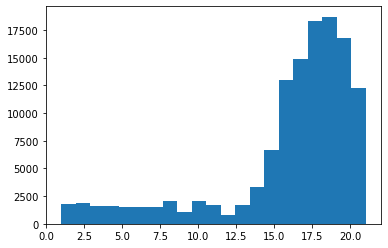

In [6]:
lengths2=[]
for point in resampled_data:
    lengths2.append(find_array_length(point[0]))
plt.hist(lengths2,bins=21)
plt.show()

In [7]:
resampled_dataset=[]
for point in resampled_data:
    resampled_dataset.append({'input':point[0],'output':point[1]})

In [8]:
import json
with open("recursive_parity_resampled_21_test.json", "w") as f:
    json.dump(resampled_dataset, f, indent=4)

In [9]:
# now generate non-recursive data
import itertools

def generate_binary_lists(n):
    return [list(map(int, seq)) for seq in itertools.product("01", repeat=n)]

dataset=[]
for list_len in range(1,22):
    binary_lists = generate_binary_lists(list_len)
    num_samples = min(15000,max(300, int(len(binary_lists) * 0.2)))
    if num_samples>len(binary_lists):
        selected_lists=binary_lists
    else:
        selected_lists = random.sample(binary_lists, num_samples)

    for ls in selected_lists:
        output = get_outputs_nonrec(ls)
        dataset.append({'input':output[0],'output':output[1]})
        
print(len(dataset))
        


101912


In [10]:
from collections import defaultdict
import tqdm
data = defaultdict(lambda: defaultdict(list))
for i, row in enumerate(tqdm.tqdm(dataset, desc=f'Processing data', disable=False)):
    prompt = row['input']
    data[prompt]['sft_target'] = row['output']

Processing data: 100%|█████████████| 101912/101912 [00:00<00:00, 1385489.74it/s]


In [11]:
def parity_resampler(data_point):
    if find_array_length(data_point[0]) == 1:
        return [data_point]*60
    if find_array_length(data_point[0]) == 2:
        return [data_point]*60
    if find_array_length(data_point[0]) == 3:
        return [data_point]*60
    if find_array_length(data_point[0]) == 4:
        return [data_point]*20
    if find_array_length(data_point[0]) < 10:
        return [data_point]*10
    if find_array_length(data_point[0]) < 15:
        return [data_point]*4
    return [data_point]

def resample_point(resampler_str, data_point):
    if resampler_str == 'parity':
        return parity_resampler(data_point)
    elif resampler_str == 'dp':
        return dp_resampler(data_point)
    elif resampler_str == 'addition':
        return addition_resampler(data_point)
    else: print('incorrect resampler string')

def find_array_length(s):
    # Regular expression to find an array pattern
    match = re.search(r'\[(-?\d+,\s*)*(-?\d+)\]', s)
    if match:
        # Extracting the array string
        array_str = match.group(0)
        # Splitting the array string into elements
        array_elements = array_str[1:-1].split(',')
        return len(array_elements)
    else:
        return None

In [12]:
resampled_data=[]
for prompt, dat in data.items():
    #if find_array_length(prompt) > 10 and random.random() < .9: continue
    resampled_data.extend(resample_point('parity',(prompt, dat['sft_target'])))

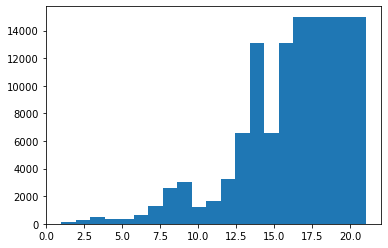

In [13]:
lengths2=[]
for point in resampled_data:
    lengths2.append(find_array_length(point[0]))
plt.hist(lengths2,bins=21)
plt.show()

In [14]:
resampled_dataset=[]
for point in resampled_data:
    resampled_dataset.append({'input':point[0],'output':point[1]})

In [15]:
import json
with open("nonrec_parity_resampled_21_test.json", "w") as f:
    json.dump(resampled_dataset, f, indent=4)